In [15]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [16]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Carregar os dados
file_path = 'NoThemeTweets.csv'  # Ajuste o caminho do arquivo se necessário
data = pd.read_csv(file_path)

In [18]:
# Verificar as colunas para confirmação
print(data.columns)

Index(['id', 'tweet_text', 'tweet_date', 'sentiment', 'query_used'], dtype='object')


In [19]:
# Definir a coluna de texto e a coluna de sentimento
data['feedback'] = data['tweet_text']
data['sentiment_real'] = data['sentiment'].map({'Positivo': 1, 'Negativo': 0})

In [20]:
# Função para análise de sentimento com TextBlob
def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 1  # Positivo
    elif polarity < 0:
        return 0  # Negativo
    else:
        return -1  # Neutro


In [21]:
# Aplicar a função aos feedbacks
data['sentiment_pred'] = data['feedback'].apply(analyze_sentiment)


In [22]:
# Filtrar dados neutros para análise de Positivo/Negativo apenas
data_filtered = data[data['sentiment_pred'] != -1]


In [23]:
# Separar rótulos reais e preditos
y_true = data_filtered['sentiment_real']
y_pred = data_filtered['sentiment_pred']


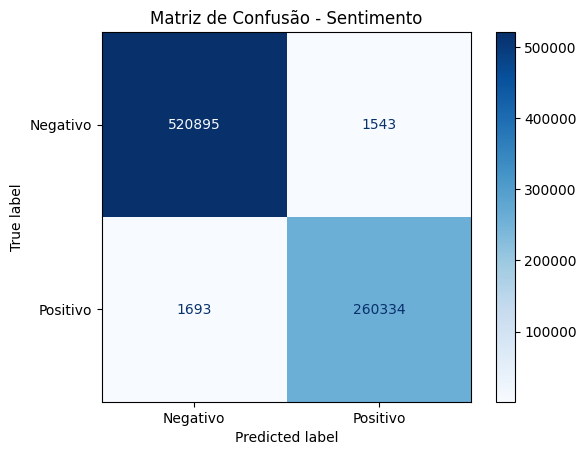

In [24]:
# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Negativo', 'Positivo']).plot(cmap='Blues')
plt.title('Matriz de Confusão - Sentimento')
plt.show()


In [25]:
# Exibir Relatório de Classificação
print(classification_report(y_true, y_pred, target_names=['Negativo', 'Positivo']))

              precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00    522438
    Positivo       0.99      0.99      0.99    262027

    accuracy                           1.00    784465
   macro avg       1.00      1.00      1.00    784465
weighted avg       1.00      1.00      1.00    784465



<ipython-input-26-2d7d71e57c12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['sentiment'], palette='viridis')


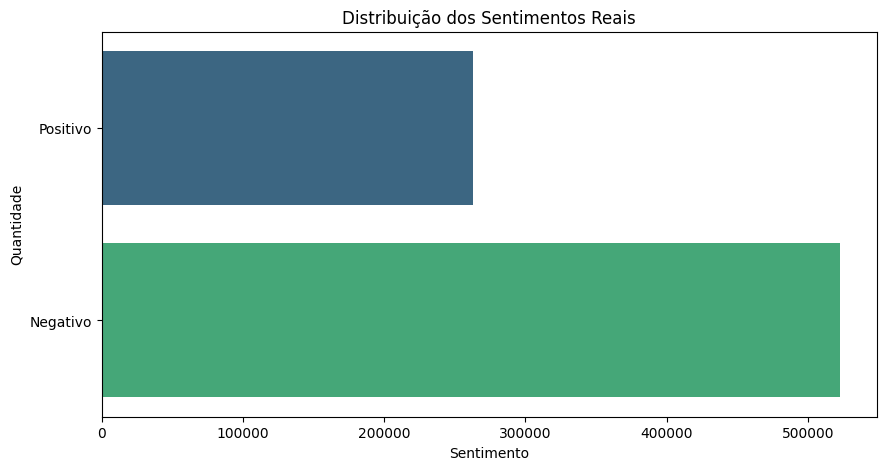

In [26]:
# Visualizar distribuição de sentimentos reais
plt.figure(figsize=(10, 5))
sns.countplot(data['sentiment'], palette='viridis')
plt.title('Distribuição dos Sentimentos Reais')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.show()


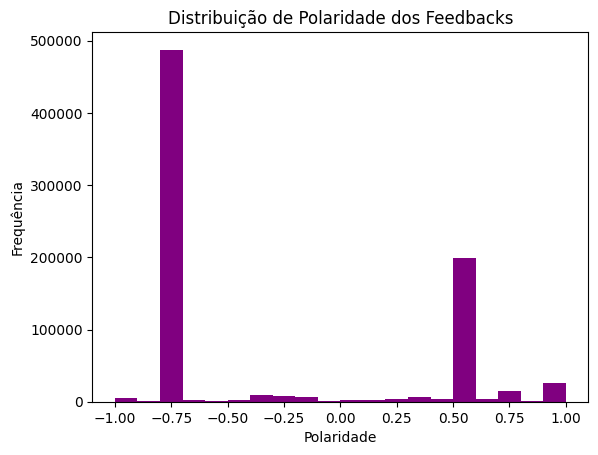

In [27]:
# Histograma de polaridade dos feedbacks
data['polarity'] = data['feedback'].apply(lambda text: TextBlob(text).sentiment.polarity)
plt.hist(data['polarity'], bins=20, color='purple')
plt.title('Distribuição de Polaridade dos Feedbacks')
plt.xlabel('Polaridade')
plt.ylabel('Frequência')
plt.show()